In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data
heart_data = pd.read_csv("./Resources/heart.csv")
heart_data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [27]:
heart_data["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

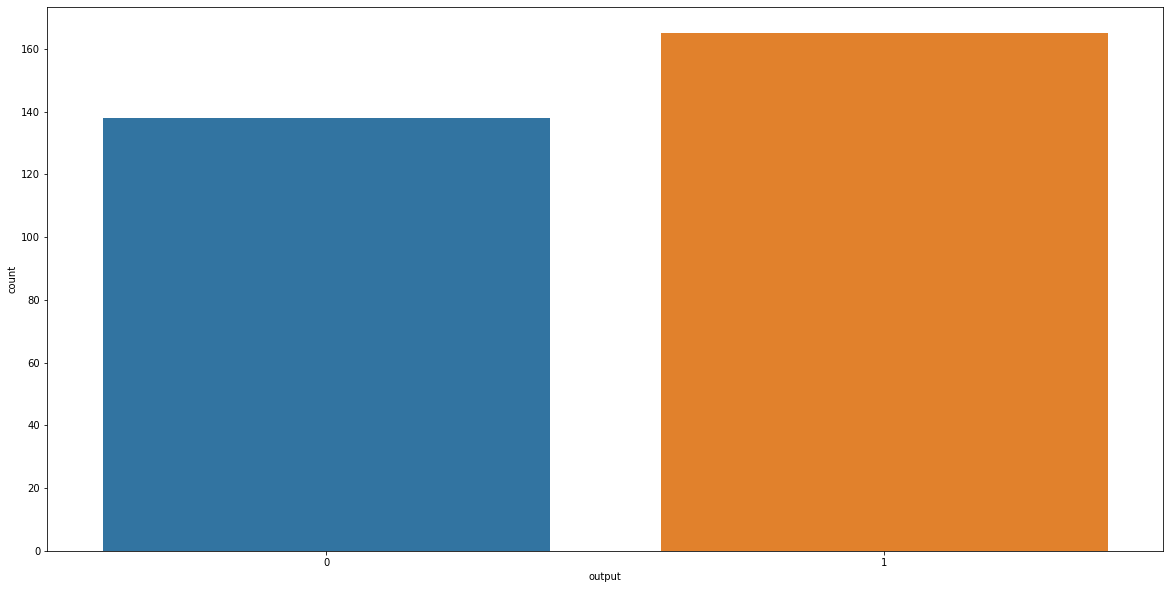

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.countplot(x="output", data=heart_data)

In [12]:
heart_data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

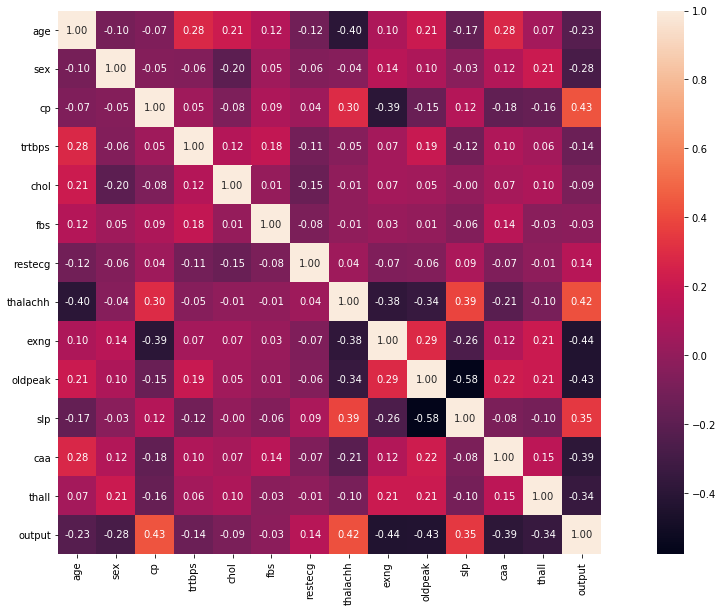

In [13]:
cols = heart_data.columns
cm = np.corrcoef(heart_data.values.T)
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
cm_2 = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt=".2f", annot_kws={"size": 10}, yticklabels=cols.values, 
                                                                                              xticklabels=cols.values)

In [14]:
heart_data["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

Text(0.5, 1.0, 'Chest Pain v. Heart Attack')

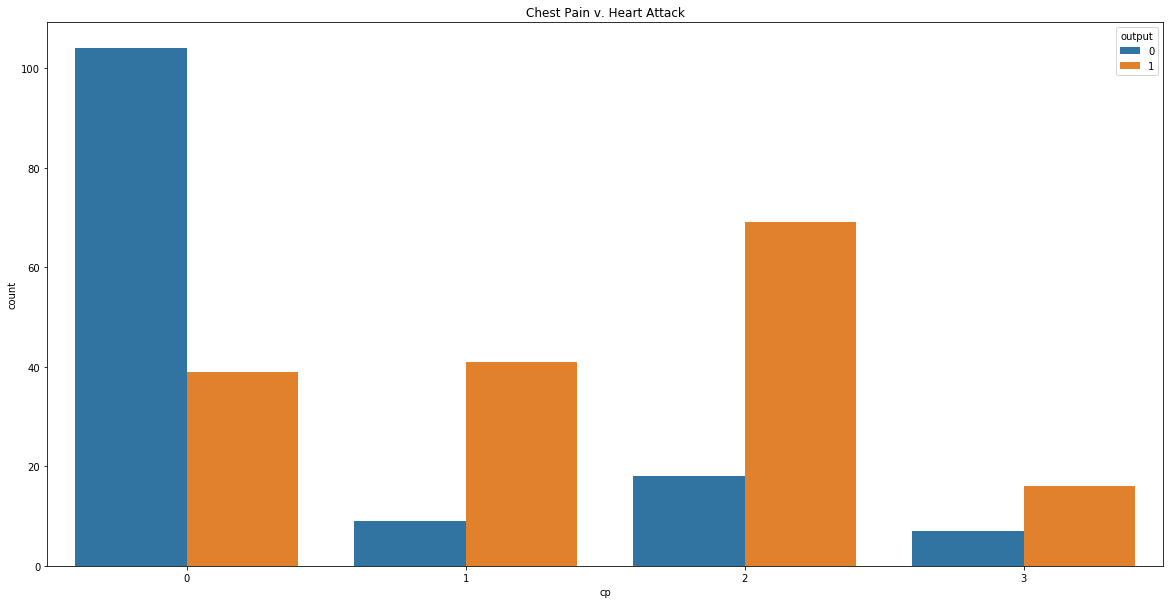

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.countplot(x="cp", data=heart_data, hue="output")
plt.title("Chest Pain v. Heart Attack")

Text(0.5, 1.0, 'Age v. Heart Rate')

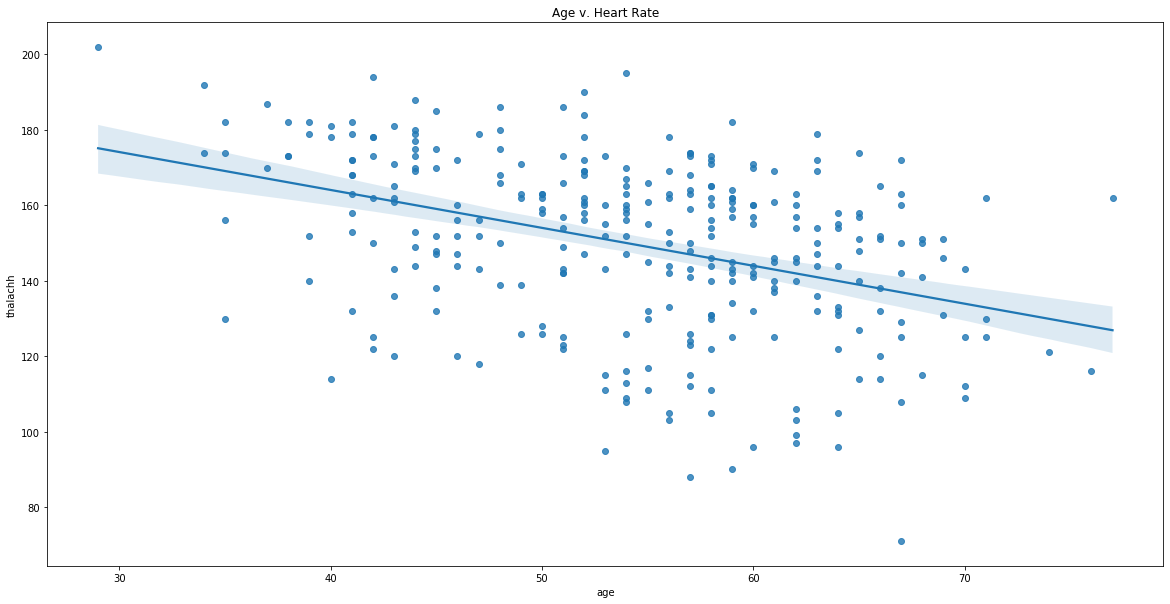

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.regplot(x="age", y="thalachh", data=heart_data)
plt.title("Age v. Heart Rate")

Text(0.5, 1.0, 'Heart Rate v. Heart Attacks')

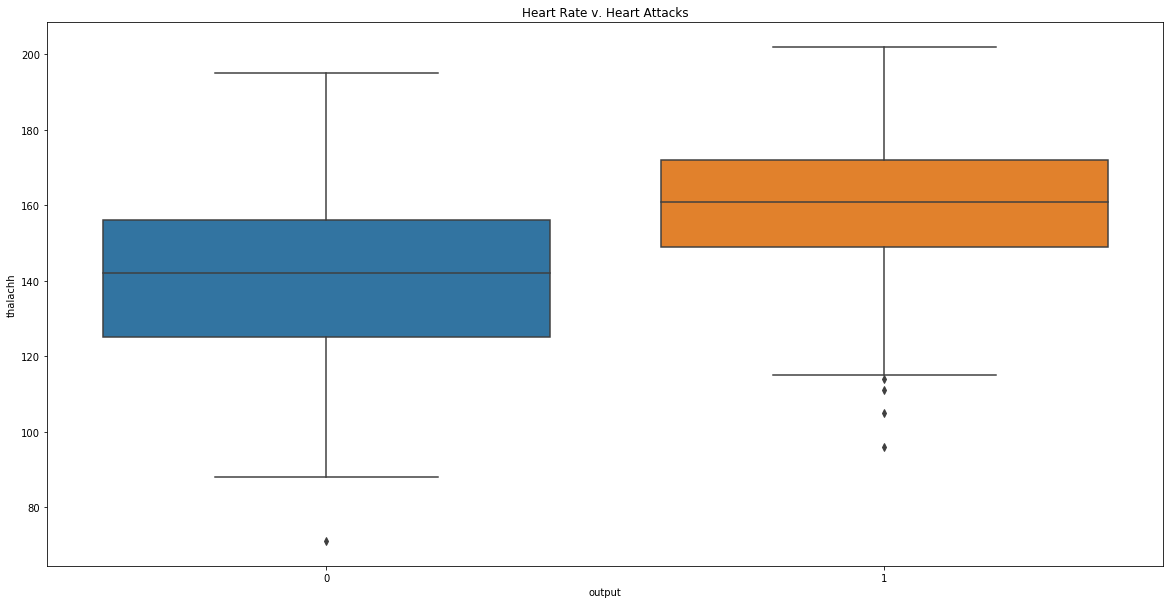

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.boxplot(x="output", y="thalachh", data=heart_data)
plt.title("Heart Rate v. Heart Attacks")

Text(0.5, 1.0, 'Heart Rate v. Heart Attacks')

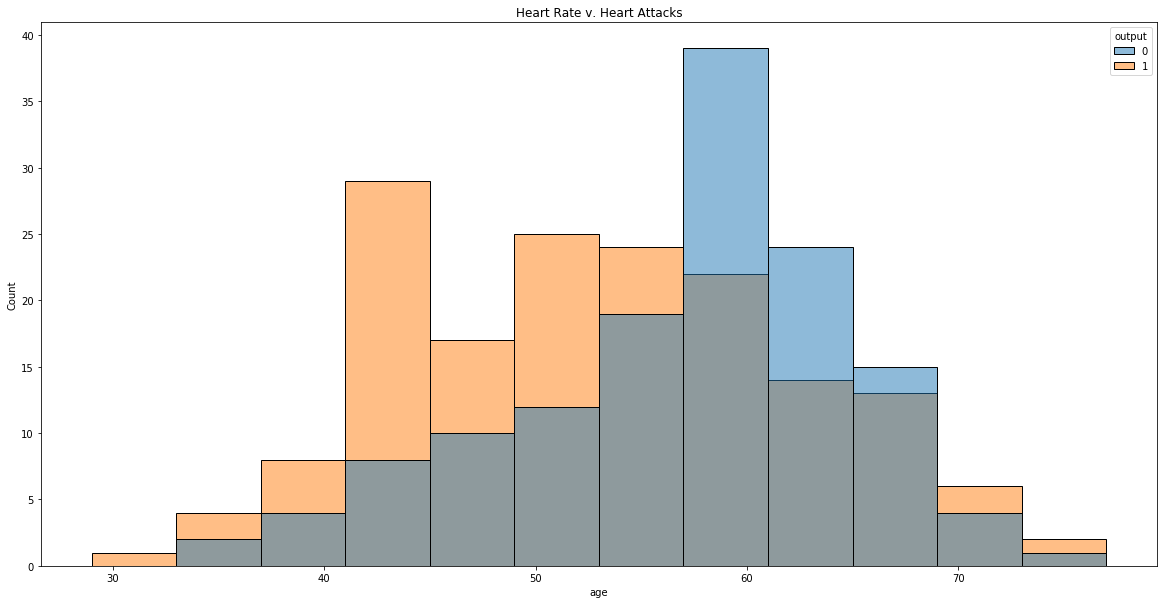

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.histplot(x="age", data=heart_data, hue="output")
plt.title("Heart Rate v. Heart Attacks")

In [32]:
X = heart_data.drop(["output"], axis=1)
y = heart_data["output"]

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=1, stratify=y)
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3
42,45,1,0,104,208,0,0,148,1,3.0,1,0,2
239,35,1,0,126,282,0,0,156,1,0.0,2,0,3
37,54,1,2,150,232,0,0,165,0,1.6,2,0,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3


In [34]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=1)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [22]:
x, y = (list(x) for x in zip(*sorted(zip(random_forest.feature_importances_, X_train.columns), reverse = True)))

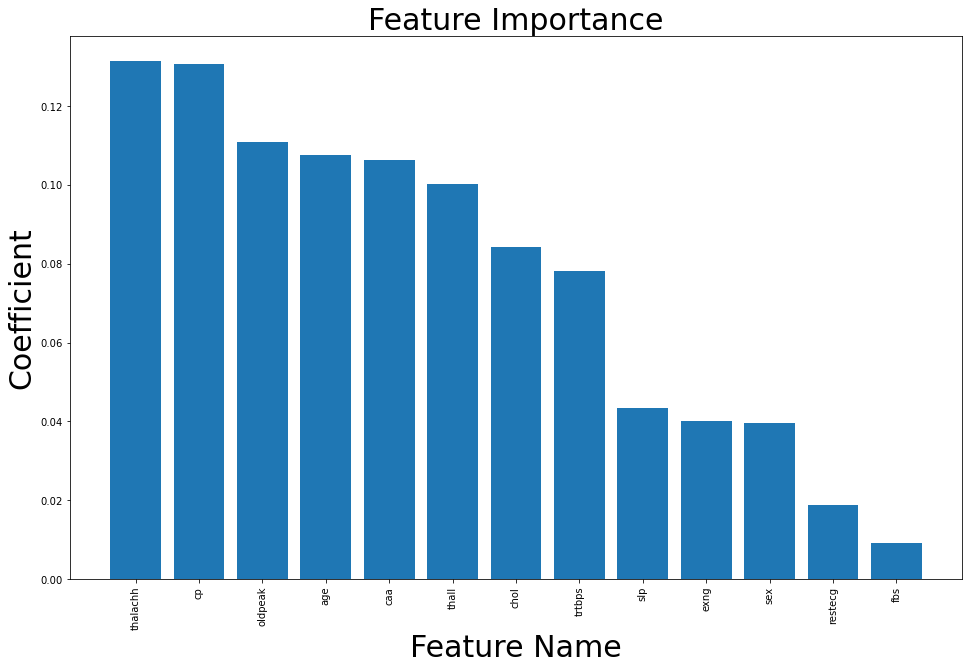

In [23]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
plt.bar(y, x)
plt.title("Feature Importance", size=30)
plt.xlabel("Feature Name", size=30)
plt.ylabel("Coefficient", size=30)
plt.xticks(size=10, rotation=90)
plt.yticks(size=10)
plt.show()

In [23]:
important_features = []
for name, importance in zip(X_train.columns, random_forest.feature_importances_):
    if importance > 0.06:
        important_features.append(name)

In [24]:
X_train = X_train.loc[:, important_features]
X_test = X_test.loc[:, important_features]

In [25]:
# Scale your data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [31]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
svm = SVC()
xgb = XGBClassifier()

In [32]:
all_models = [rf, dt, svm, xgb]
for clf in all_models:
    print("model: " + str(clf))
    clf.fit(X_train_scaled, y_train)
    predictions = clf.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, predictions)
    print("accuracy: " + str(accuracy))
    print("__________")

model: RandomForestClassifier()
accuracy: 0.7631578947368421
__________
model: DecisionTreeClassifier()
accuracy: 0.6973684210526315
__________
model: SVC()
accuracy: 0.75
__________
model: XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)
[20:26:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objec

C:\Users\Elizabeth\anaconda4\envs\PythonAdv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [33]:
majority_predictions = np.ones(len(X_test))

In [34]:
baseline = accuracy_score(y_test, majority_predictions)
baseline

0.5394736842105263

In [35]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

In [36]:
params = {"bootstrap": [True, False], 
          "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
          "max_features": ["auto", "sqrt"], 
          "min_samples_leaf": [1, 2, 3, 4],
          "min_samples_split": [2, 5, 10],
          "n_estimators": [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
         }
rf = RandomForestClassifier(random_state=0)
folds = 5
param_combo = 5
inner_cv = StratifiedKFold(n_splits = folds, shuffle=True, random_state=True)
outer_cv = StratifiedKFold(n_splits = folds, shuffle=True, random_state=True)
random_search = RandomizedSearchCV(rf, param_distributions=params, n_iter=param_combo, n_jobs=4, 
                                   cv=inner_cv.split(X_train_scaled, y_train), random_state=12, verbose=3)
random_search.fit(X_train_scaled, y_train)
print("best_estimator")
print(random_search.best_estimator_)
print("best_hyper_parameters")
print(random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
best_estimator
RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1000, random_state=0)
best_hyper_parameters
{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': False}


In [37]:
best_rf = RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1000, random_state=0)
best_rf.fit(X_train_scaled, y_train)
predictions = best_rf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print("accuracy: " + str(accuracy))
print("__________")

accuracy: 0.8289473684210527
__________


In [38]:
params_xg = {
            "min_child_weight": [1, 5, 10],
            "gamma": [0.5, 1, 1.5, 2, 2.5],
            "subsample": [0.6, 0.8, 1],
            "colsample_bytree": [0.6, 0.8, 1],
            "max_depth": [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
         }
xg = XGBClassifier(random_state=0)
folds = 5
param_combo = 5
inner_cv = StratifiedKFold(n_splits = folds, shuffle=True, random_state=True)
outer_cv = StratifiedKFold(n_splits = folds, shuffle=True, random_state=True)
random_search = RandomizedSearchCV(xg, param_distributions=params, n_iter=param_combo, n_jobs=4, 
                                   cv=inner_cv.split(X_train_scaled, y_train), random_state=12, verbose=3)
random_search.fit(X_train_scaled, y_train)
print("best_estimator")
print(random_search.best_estimator_)
print("best_hyper_parameters")
print(random_search.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Elizabeth\anaconda4\envs\PythonAdv\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:27:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "bootstrap", "max_features", "min_samples_leaf", "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:27:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
best_estimator
XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=False,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_const

In [30]:
best_xg = XGBClassifier(base_score=0.5, booster='gbtree', bootstrap=False,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=40, max_features='sqrt',
              min_child_weight=1, min_samples_leaf=3, min_samples_split=10,
              monotone_constraints='()', n_estimators=1200,
              n_jobs=4, num_parallel_tree=1, random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_xg.fit(X_train_scaled, y_train)
predictions = best_xg.predict(X_test_scaled)
accuracy = accuracy_score(y_test, predictions)
print("accuracy: " + str(accuracy))
print("__________")

NameError: name 'XGBClassifier' is not defined

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(bootstrap=False, max_depth=60, min_samples_leaf=4,
                       min_samples_split=10, n_estimators=1000, random_state=0)
scores = cross_val_score(rf, X_scaled, y, cv=5)
rf.fit(X_scaled,y)
print(np.mean(scores))
print(scores)

0.8282513661202187
[0.80327869 0.90163934 0.81967213 0.83333333 0.78333333]


In [42]:
# Creating a pickle file for the classifier
filename = 'heart_attack_prediction_rfc_model.pkl'
joblib.dump(rf, filename)
filename='scaler.pkl'
joblib.dump(scaler,filename)

['scaler.pkl']

# User Input Code

In [43]:
import joblib
scaler = joblib.load('scaler.pkl')
model = joblib.load('heart_attack_prediction_rfc_model.pkl')

In [7]:
while True:
    try:
        age = int(input('Insert the age of the patient: '))
        break
    except:
        print('Not a valid option')

Insert the age of the patient:  63


In [10]:
while True:
    try:
        sex = int(input('Insert the sex of the patient: 0 for female 1 for male'))
        break
    except:
        print('Not a valid option')

Insert the sex of the patient: 0 for female 1 for male 1


In [11]:
while True:
    try:
        cp = int(input('Insert the chest pain of the patient:(0, 1, 2, or 3) '))
        break
    except:
        print('Not a valid option')

Insert the chest pain of the patient:(0, 1, 2, or 3)  3


In [12]:
while True:
    try:
        tr = int(input('Insert the blood pressure level of the patient: (eg. 130)'))
        break
    except:
        print('Not a valid option')

Insert the blood pressure level of the patient: (eg. 130) 145


In [13]:
while True:
    try:
        chol = int(input('Insert the cholestoral level of the patient: (eg. 233)'))
        break
    except:
        print('Not a valid option')

Insert the cholestoral level of the patient: (eg. 233) 233


In [14]:
while True:
    try:
        fbs = int(input('Blood Pressure greater than 120?: 1 for true, 0 for false'))
        break
    except:
        print('Not a valid option')

Blood Pressure greater than 120?: 1 for true, 0 for false 1


In [15]:
while True:
    try:
        ecg = int(input('Electrocardiographic results: 1 for true, 0 for false '))
        break
    except:
        print('Not a valid option')

Electrocardiographic results: 1 for true, 0 for false  0


In [16]:
while True:
    try:
        chh = int(input('Insert maximum hear rate levels: (eg. 171)'))
        break
    except:
        print('Not a valid option')

Insert maximum hear rate levels: (eg. 171) 150


In [17]:
while True:
    try:
        exng = int(input('Induced angina? 1 for yes, 0 for no'))
        break
    except:
        print('Not a valid option')

Induced angina? 1 for yes, 0 for no 0


In [18]:
while True:
    try:
        peak = float(input('Previous Peak: (eg. 3.5)'))
        break
    except:
        print('Not a valid option')

Previous Peak: (eg. 3.5) 2.3


In [19]:
while True:
    try:
        slp = int(input('Slope (0 - 2)'))
        break
    except:
        print('Not a valid option')

Slope (0 - 2) 0


In [20]:
while True:
    try:
        caa = int(input('Number of Vessels (0 - 3)'))
        break
    except:
        print('Not a valid option')

Number of Vessels (0 - 3) 0


In [21]:
while True:
    try:
        thall = int(input('Thal Rate (0 - 3)'))
        break
    except:
        print('Not a valid option')

Thal Rate (0 - 3) 1


In [44]:
answers = [age, sex, cp, trtbps, chol, fbs, ecg, thal, exng, peak, slp, caa, thall]
data_scaled = scaler.transform(np.array(answers).reshape(1,-1))
prediction = model.predict(data_scaled)

In [45]:
prediction

array([1])